In [ ]:
import numpy as np
import scipy
from random import random
import seaborn as sns
import matplotlib.pyplot as plt

# Q1

Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis
in two strains of mice, A and B. They have tumor count data for 10 mice
in strain A and 13 mice in strain B. Type A mice have been well studied,
and information from other laboratories suggests that type A mice have
tumor counts that are approximately Poisson-distributed with a mean of
12, Tumor count rates for type B mice are unknown, but type B mice are
related to type A mice. The observed tumor counts for the two populations
are
yA = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);
yB = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).

a) Find the posterior distributions, means, variances and 95% quantile-based confidence intervals for θA and θB, assuming a Poisson sampling
distribution for each group and the following prior distribution:
θA ∼ gamma(120,10), θB ∼ gamma(12,1), p(θA, θB) = p(θA)×p(θB).


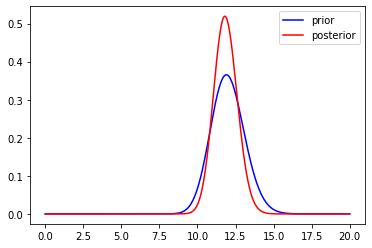

posterior mean :  11.850000000000001
posterior variance :  0.5925000000000001


array([10.38923819, 13.40544833])

In [ ]:
# about theta_a

a = 120 ; b = 10
prior_a = scipy.stats.gamma(a, scale = 1/b)
y_a = np.array([12, 9, 12, 14, 13, 13, 15, 8, 15, 6])
a = a + sum(y_a) ; b = b + len(y_a)
posterior_a = scipy.stats.gamma(a, scale = 1/b) # p. 46

x = np.linspace(0, 20, 1000)
plt.plot(x, prior_a.pdf(x), 'b-', label = 'prior')
plt.plot(x, posterior_a.pdf(x),'r-', label = 'posterior')
plt.legend()
plt.show()

print("posterior mean : ", posterior_a.mean()) # mean
print("posterior variance : ", posterior_a.var()) # variance
posterior_a.ppf((0.025, 0.975)) # 95% quantile based confidence interval

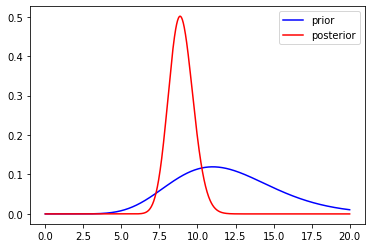

posterior mean :  8.928571428571429
posterior variance :  0.6377551020408163


array([ 7.43206422, 10.56030815])

In [ ]:
# about theta_b

a = 12; b = 1
prior_b = scipy.stats.gamma(a, scale = 1/b)
y_b = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])
a = a + sum(y_b) ; b = b + len(y_b)
posterior_b = scipy.stats.gamma(a, scale = 1/b) # p. 46

x = np.linspace(0, 20, 1000)
plt.plot(x, prior_b.pdf(x), 'b-', label = 'prior')
plt.plot(x, posterior_b.pdf(x),'r-', label = 'posterior')
plt.legend()
plt.show()

print("posterior mean : ", posterior_b.mean()) # mean
print("posterior variance : ", posterior_b.var()) # variance
posterior_b.ppf((0.025, 0.975)) # 95% quantile based confidence interval

b) Compute and plot the posterior expectation of θB under the prior distribution θB ∼ gamma(12×n0, n0) for each value of n0 ∈ {1, 2, . . . , 50}.
Describe what sort of prior beliefs about θB would be necessary in order for the posterior expectation of θB to be close to that of θA.


In [ ]:
def draw_posterior(n0):
  n0 = n0
  a = 12 * n0 ; b = 1 * n0
  prior = scipy.stats.gamma(a, scale = 1/b)
  y_b = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])
  a = a + sum(y_b) ; b = b + len(y_b)
  posterior = scipy.stats.gamma(a, scale = 1/b) 
  x = np.linspace(0, 20, 1000)
  plt.plot(x, posterior.pdf(x), alpha = 0.5, label = f'{n0}')
  plt.legend()

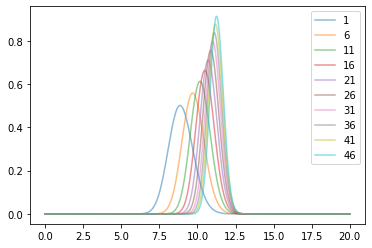

In [ ]:
for i in range(0, 50):
  if i % 5 == 0: # 50개의 함수를 모두 그려도 되지만, 가독성을 위해 5의 배수일 때만 표시
    a = draw_posterior(i + 1) 
plt.show()

# weak prior일 때, posterior가 data의 영향을 많이 받아 왼쪽으로 크게 움직인다. 

In [ ]:
def get_expectation(n0):
  n0 = n0
  a = 12 * n0 ; b = 1 * n0
  prior = scipy.stats.gamma(a, scale = 1/b)
  y_b = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])
  a = a + sum(y_b) ; b = b + len(y_b)
  posterior = scipy.stats.gamma(a, scale = 1/b) 
  expectation = posterior.mean()
  return expectation

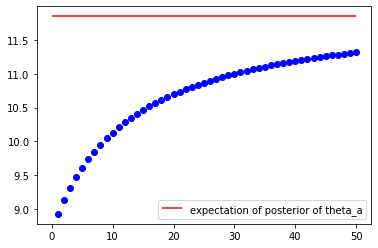

In [ ]:
for i in range(0, 50):
  plt.scatter(i+1, get_expectation(i+1), color = "blue")

plt.hlines(posterior_a.mean(), xmin = 0, xmax = 50, color = "red", label= "expectation of posterior of theta_a")
plt.legend(loc = "lower right")
# n0 = 50, strong prior를 가질 때, theta_a의 기댓값과 가장 비슷하다. 

c) Should knowledge about population A tell us anything about population B? Discuss whether or not it makes sense to have p(θA, θB) =
p(θA) × p(θB).

모집단 A에 속한 쥐의 정보가 모집단 B의 $\theta$에 대해 정보를 주지 못하므로 여전히 독립관계가 유지된다. 

# Q2 


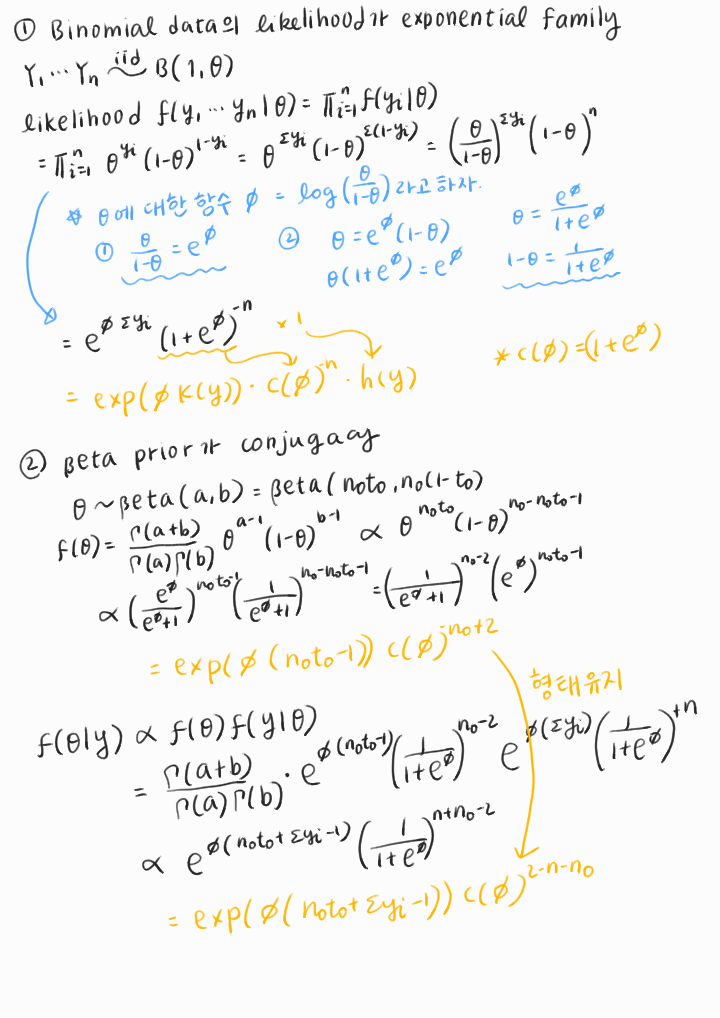

# Q3



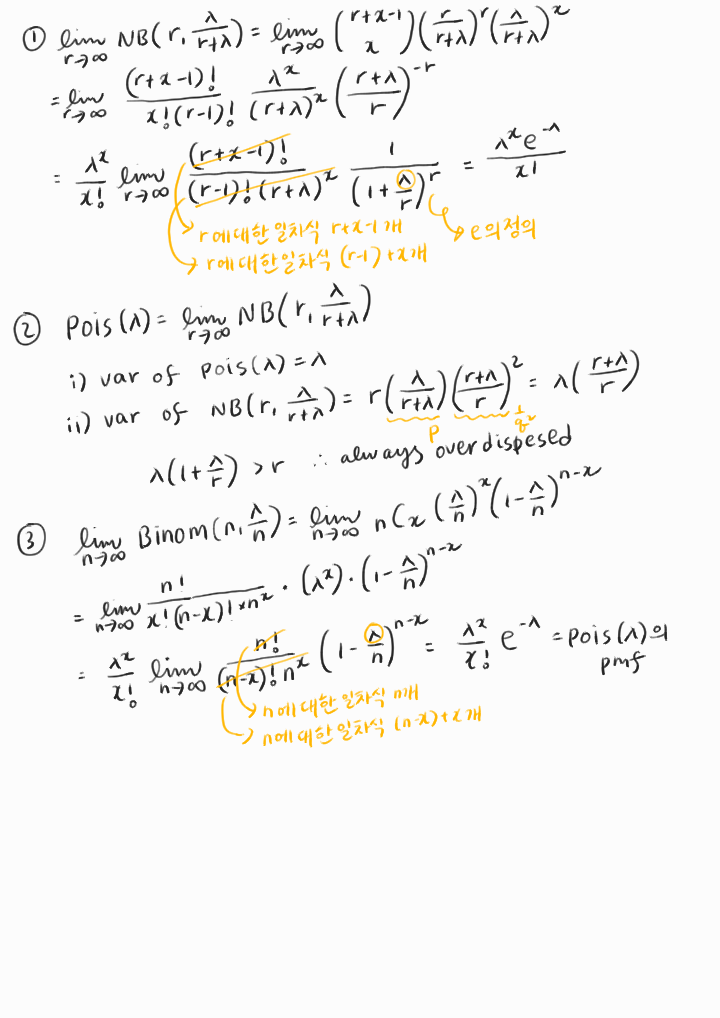